In [ ]:
%pip install openpyxl

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
df_athletes = pd.read_excel('Athletes.xlsx')
df_coaches = pd.read_excel("Coaches.xlsx")
df_entries_gender = pd.read_excel("EntriesGender.xlsx")
df_medals = pd.read_excel("Medals.xlsx")
df_teams = pd.read_excel("Teams.xlsx")

In [152]:
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [157]:
# Medal distribution by country
medal_counts = df_medals[["Team/NOC", "Total"]].sort_values(by="Total", ascending=False).reset_index(drop=True)
medal_counts

,Team/NOC,Total
0,United States of America,113
1,People's Republic of China,88
2,ROC,71
3,Great Britain,65
4,Japan,58
...,...,...
88,Ghana,1
89,Grenada,1
90,Kuwait,1
91,Republic of Moldova,1


C:\Users\Ravin Jangir\AppData\Local\Temp\ipykernel_26820\1035820305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medal_counts, x="Team/NOC", y="Total", palette="viridis")


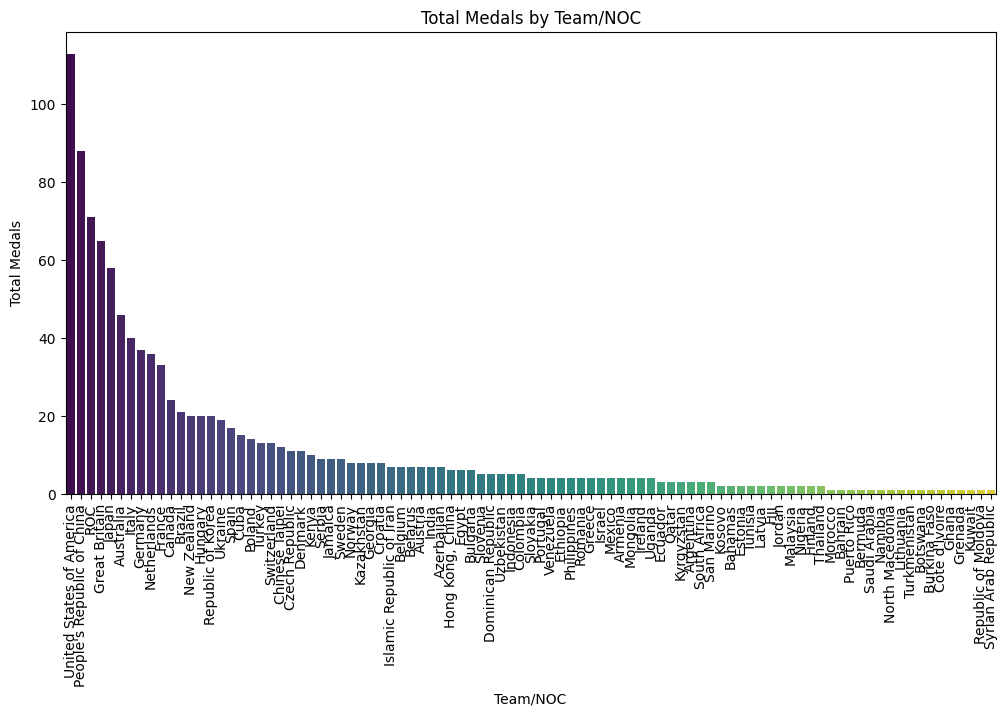

In [190]:
plt.figure(figsize=(12, 6))
sns.barplot(data=medal_counts, x="Team/NOC", y="Total", palette="viridis")
plt.xticks(rotation="vertical")

plt.xlabel("Team/NOC")
plt.ylabel("Total Medals")
plt.title("Total Medals by Team/NOC")
plt.show()

In [137]:
corr1 = df_medals[["Rank", "Total"]].corr()
corr1
df_athlete_by_noc = (
    df_athletes[["NOC", "Name"]]
    .groupby("NOC")
    .count()
    .sort_values(by="Name", ascending=False)
    .reset_index()
)
df_athlete_by_noc

,NOC,Name
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400
...,...,...
201,Somalia,2
202,St Vincent and the Grenadines,2
203,Tuvalu,2
204,United Republic of Tanzania,2


In [138]:
df_country_athlete_merge = pd.merge(df_athlete_by_noc, medal_counts, left_on="NOC", right_on="Team/NOC", how="inner")
df_country_athlete_merge[["NOC", "Name", "Total"]]

,NOC,Name,Total
0,United States of America,615,113
1,Japan,586,58
2,Australia,470,46
3,People's Republic of China,401,88
4,Germany,400,37
...,...,...,...
88,Burkina Faso,7,1
89,Syrian Arab Republic,6,1
90,Grenada,6,1
91,San Marino,4,3


In [139]:
corr_df_athlete_medals = df_country_athlete_merge[["Name", "Total"]].corr()
corr_df_athlete_medals

,Name,Total
Name,1.000000,0.875115
Total,0.875115,1.000000


In [145]:
df_entries_gender.head()
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [ ]:
# Gender participation and medal trends
total_male = df_entries_gender[["Male"]].sum()
total_female = df_entries_gender[["Female"]].sum()

print("Total Male Athletes:", total_male)
print("Total Female Athletes:", total_female)

# Calculate gender ratio per discipline
df_entries_gender["Female_Ratio"] = (
    df_entries_gender["Female"] / df_entries_gender["Total"]
)
df_entries_gender["Male_Ratio"] = df_entries_gender["Male"] / df_entries_gender["Total"]

# Merge with medals (need sport-level medals – but df_medals is only per NOC, so we can only do estimates)
# Example: Which sports were most gender balanced?
df_entries_gender[["Discipline", "Female_Ratio", "Male_Ratio"]].sort_values(
    "Female_Ratio", ascending=False
).head(10)

Total Male Athletes: Male    5884
dtype: int64
Total Female Athletes: Female    5432
dtype: int64


,Discipline,Female_Ratio,Male_Ratio
3,Artistic Swimming,1.000000,0.000000
28,Rhythmic Gymnastics,1.000000,0.000000
12,Cycling BMX Freestyle,0.526316,0.473684
17,Diving,0.503497,0.496503
1,Archery,0.500000,0.500000
2,Artistic Gymnastics,0.500000,0.500000
13,Cycling BMX Racing,0.500000,0.500000
8,Beach Volleyball,0.500000,0.500000
10,Canoe Slalom,0.500000,0.500000
23,Hockey,0.500000,0.500000


In [169]:
df_medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [170]:
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [195]:
# Most successful athletes or teams
# Merge team entries with medals
from itertools import groupby


teams_medals = df_teams.merge(df_medals, left_on="NOC", right_on="Team/NOC", how="left")
teams_medals

# Count medals per team discipline
team_success = (
    teams_medals.groupby(["Name", "Discipline"])[["Gold", "Silver", "Bronze", "Total"]]
    .sum()
    .sort_values("Total", ascending=False)
    .head(10)
)

team_success

Gold  Silver  Bronze  Total
Name          Discipline                                 
United States Swimming       273.0   287.0   231.0  791.0
              Fencing        234.0   246.0   198.0  678.0
              Athletics      195.0   205.0   165.0  565.0
China         Swimming       228.0   192.0   108.0  528.0
ROC           Swimming       140.0   196.0   161.0  497.0
              Fencing        120.0   168.0   138.0  426.0
Japan         Swimming       189.0    98.0   119.0  406.0
Great Britain Swimming       132.0   126.0   132.0  390.0
United States Archery        117.0   123.0    99.0  339.0
              Cycling Track  117.0   123.0    99.0  339.0

In [179]:
# Top 10 sports by number of participants
competition = df_entries_gender.sort_values("Total", ascending=False).reset_index(drop=True).head(10)
competition

,Discipline,Female,Male,Total,Female_Ratio,Male_Ratio
0,Athletics,969,1072,2041,0.474767,0.525233
1,Swimming,361,418,779,0.463415,0.536585
2,Football,264,344,608,0.434211,0.565789
3,Rowing,257,265,522,0.492337,0.507663
4,Judo,192,201,393,0.488550,0.511450
5,Hockey,192,192,384,0.500000,0.500000
6,Shooting,178,178,356,0.500000,0.500000
7,Sailing,175,175,350,0.500000,0.500000
8,Handball,168,168,336,0.500000,0.500000
9,Rugby Sevens,146,151,297,0.491582,0.508418


C:\Users\Ravin Jangir\AppData\Local\Temp\ipykernel_26820\1911835553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total", y="Discipline", data=competition, palette="viridis")


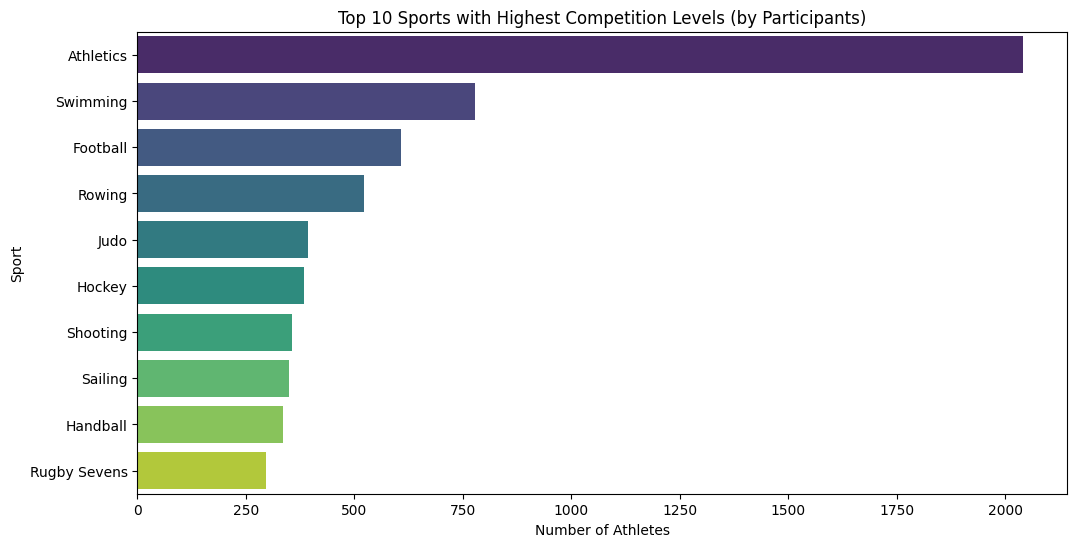

In [180]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Total", y="Discipline", data=competition, palette="viridis")
plt.title("Top 10 Sports with Highest Competition Levels (by Participants)")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.show()

In [192]:
# Medal tallies over sports categories
medals_by_sport = (
    teams_medals.groupby("Discipline")[["Gold", "Silver", "Bronze", "Total"]]
    .sum()
    .sort_values("Total", ascending=False)
    .reset_index()
)
medals_by_sport

,Discipline,Gold,Silver,Bronze,Total
0,Swimming,1508.0,1410.0,1524.0,4442.0
1,Athletics,790.0,760.0,860.0,2410.0
2,Fencing,797.0,784.0,798.0,2379.0
3,Cycling Track,727.0,709.0,862.0,2298.0
4,Archery,588.0,564.0,636.0,1788.0
5,Beach Volleyball,563.0,546.0,585.0,1694.0
6,Table Tennis,477.0,407.0,463.0,1347.0
7,Artistic Gymnastics,377.0,375.0,371.0,1123.0
8,Artistic Swimming,338.0,322.0,371.0,1031.0
9,Rugby Sevens,332.0,283.0,304.0,919.0
